#working notebook and notes for feature engineering
#url: https://github.com/malfaroe/feature-engineering-and-feature-selection.git
#About the feature engineering concept: https://medium.com/mindorks/what-is-feature-engineering-for-machine-learning-d8ba3158d97a

#definiton: Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, 
resulting in improved model accuracy on unseen data. Feature engineering turn your inputs
into things the algorithm can understand.

PART 1: DATA EXPLORATION

In [151]:
#importing libraries...
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import os

plt.style.use("seaborn-colorblind")
%matplotlib inline



In [152]:
#reading the dataset titanic.csv
use_cols = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Survived']
data = pd.read_csv("titanic.csv", usecols= use_cols, ) #usaremos usecols porque se quieren usar ciertas columnas del dataset

In [153]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500


In [154]:
#get dtypes for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [155]:
#general description...
data.describe()

,Survived,Pclass,Age,SibSp,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,32.204208
std,0.486592,0.836071,14.526497,1.102743,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,512.329200


#UNIVARIATE ANALYSIS: definition: we pick up one feature and based on that one feature we try to determine what the output is.
In this case for example we could pick up Pclass and try to determine the Survived output


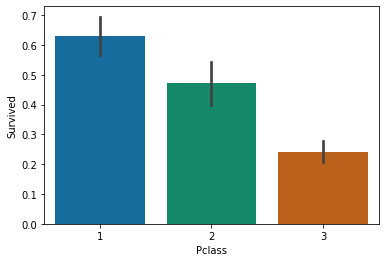

In [156]:
sns.barplot(x = "Pclass", y = "Survived", data = data) #indica la tendencia central (mean) de los datos
#barplot plots the relationship between a categorical and a numerical variable
#Several values per group? Don’t use a barplot. Even with error bars, it hides information and other type of graphic
#like boxplot or violin are much more appropriate.
#abajo: por cada clase cuanto fue el valor de sobrevivencia promedio

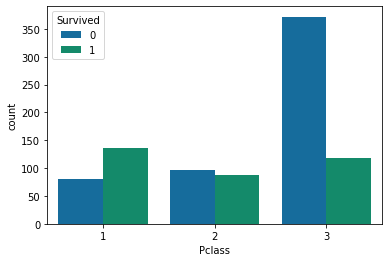

In [157]:
sns.countplot(x = "Pclass", hue = "Survived", data = data)

In [158]:
#countplot nos da un conteo de la frecuencia absoluta. En este caso sacamos el conteo de sobrev. por clase de pasaje

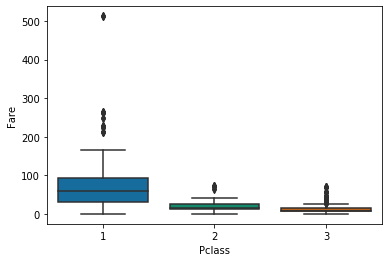

In [159]:
#discrete variable boxplot: podemos hacer un boxplot separando el comportamiento de una variable por tramos de otra
#por ejemplo: comportamiento de fare segun la clase
sns.boxplot(x = "Pclass", y = "Fare", data= data)

In [160]:
#podemos ver los indicadores de tendencia central y dispersion segun la clase del pasaje, visualizando tambien outliers

In [161]:
#Analisis de distrbucion vbariables continuas: histograma
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


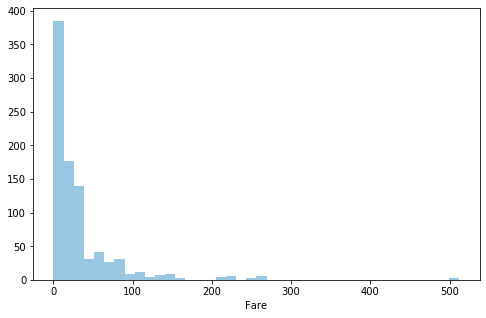

In [162]:
fig = plt.subplots(figsize = (8, 5))
sns.distplot(a = data["Fare"], bins= 40,kde = False )

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


#BIVARIATE ANALYSIS

In [164]:
#definition: is the descriptive statistics between two variables---

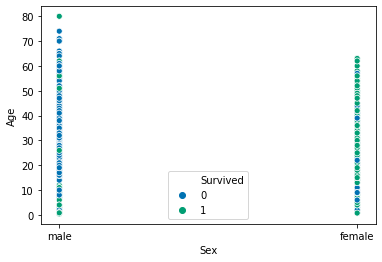

In [165]:
#B1: Scatterplot
sns.scatterplot(x= "Sex", y = "Age", hue = "Survived", data = data)

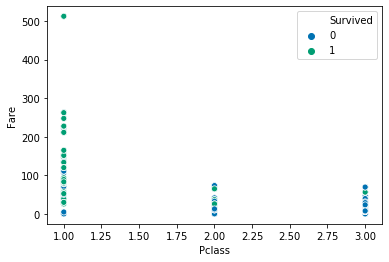

In [166]:
sns.scatterplot(x = "Pclass", y = "Fare", hue = "Survived", data = data)

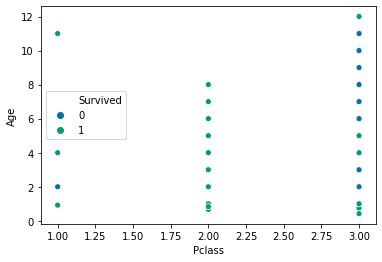

In [167]:
#edades de niños por clase 
sns.scatterplot(x = "Pclass", y = "Age", hue = "Survived", data = data[data["Age"] <13])

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


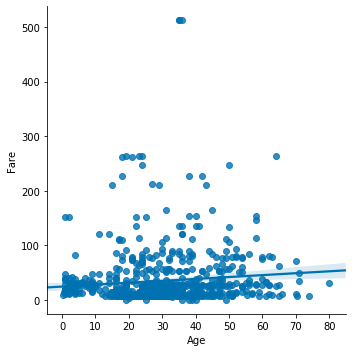

In [169]:
sns.lmplot(x = "Age", y = "Fare", data = data)

In [170]:
#B2: Correlation matrix...
data.corr()

,Survived,Pclass,Age,SibSp,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.159651
Fare,0.257307,-0.549500,0.096067,0.159651,1.000000


In [171]:
#B3: Heatmap
#usamos el dataset flights
flights = sns.load_dataset("flights") #loadas dataset from the online repository

In [172]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [173]:
#creo una tabla mas interesante: numero de pasajeros por mes y año con pivot table...

In [174]:
pivote = pd.pivot(data = flights, index= "year", columns= "month", values= "passengers")

In [175]:
pivote.head()

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


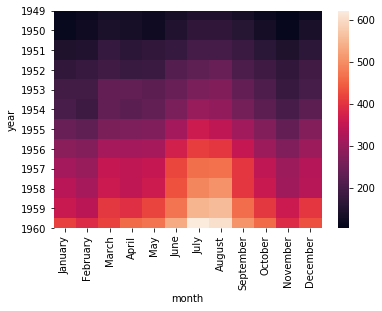

In [176]:
sns.heatmap(pivote)

####2. FEATURE CLEANING###

In [177]:
###2.1 Missing Values

In [178]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare'], dtype='object')

In [179]:
#missing value checking...
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Fare          0
dtype: int64

In [180]:
#Método 1: listwise deletion (se borran los null)...

In [181]:
data_listwise = data.dropna()

In [182]:
data_listwise.shape

(714, 6)

In [183]:
#Metodo 2: Add another variable( column) to indicate if there is a NA

In [184]:
from numpy import nan
import math 
def new_col(col):
    for i in range(len(data["Age"])):
        if np.isnan(data["Age"][i]):
            col[i] = 1
        else:
            col[i] = 0
    return col 
            
        

In [185]:
data["Nan_check_age"] = data["Age"]
data["Nan_check_age"] = new_col(data["Nan_check_age"])

In [186]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Fare,Nan_check_age
0,0,3,male,22.0,1,7.2500,0.0
1,1,1,female,38.0,1,71.2833,0.0
2,1,3,female,26.0,0,7.9250,0.0
3,1,1,female,35.0,1,53.1000,0.0
4,0,3,male,35.0,0,8.0500,0.0
5,0,3,male,NaN,0,8.4583,1.0
6,0,1,male,54.0,0,51.8625,0.0
7,0,3,male,2.0,3,21.0750,0.0
8,1,3,female,27.0,0,11.1333,0.0
9,1,2,female,14.0,1,30.0708,0.0


In [187]:
#Metodo 3: Fillna con arbitrary values
data_2 = data.copy()
data_2["Age"].fillna(value = -999,inplace = True)

In [188]:
data_2.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Nan_check_age
0,0,3,male,22.0,1,7.2500,0.0
1,1,1,female,38.0,1,71.2833,0.0
2,1,3,female,26.0,0,7.9250,0.0
3,1,1,female,35.0,1,53.1000,0.0
4,0,3,male,35.0,0,8.0500,0.0


In [189]:
data_2.isnull().sum()

Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Fare             0
Nan_check_age    0
dtype: int64

In [190]:
#Metodo 4: Fillna con mean, median, mode

In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Sex              891 non-null object
Age              714 non-null float64
SibSp            891 non-null int64
Fare             891 non-null float64
Nan_check_age    891 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 48.9+ KB


In [192]:
#ojo que Age es objeto, asi que hay que convertirlo a float
data_3 = data.copy()
mean_3 = pd.to_numeric(data_3["Age"], errors='coerce').mean() #se usa to_numeric para convertirlo a float
data_3["Age"].fillna(value = mean_3, inplace = True)
data_3["Age"].head(30)

0     22.000000
1     38.000000
2     26.000000
3     35.000000
4     35.000000
5     29.699118
6     54.000000
7      2.000000
8     27.000000
9     14.000000
10     4.000000
11    58.000000
12    20.000000
13    39.000000
14    14.000000
15    55.000000
16     2.000000
17    29.699118
18    31.000000
19    29.699118
20    35.000000
21    34.000000
22    15.000000
23    28.000000
24     8.000000
25    38.000000
26    29.699118
27    19.000000
28    29.699118
29    29.699118
Name: Age, dtype: float64

In [193]:
#Metodo 4: replacing the NA by values that are at the far end of the distribution of that 
#variable calculated by mean + 3*std
data_4 = data.copy()
value_age = np.mean(data_4["Age"]) + 3 * np.std(data_4["Age"])
data_4["Age"].fillna(value = value_age, inplace = True )
data_4.head(10)



,Survived,Pclass,Sex,Age,SibSp,Fare,Nan_check_age
0,0,3,male,22.000000,1,7.2500,0.0
1,1,1,female,38.000000,1,71.2833,0.0
2,1,3,female,26.000000,0,7.9250,0.0
3,1,1,female,35.000000,1,53.1000,0.0
4,0,3,male,35.000000,0,8.0500,0.0
5,0,3,male,73.248081,0,8.4583,1.0
6,0,1,male,54.000000,0,51.8625,0.0
7,0,3,male,2.000000,3,21.0750,0.0
8,1,3,female,27.000000,0,11.1333,0.0
9,1,2,female,14.000000,1,30.0708,0.0


In [194]:
#Metodo 5: Random imputation: replace the NaNs with values randomly picked from the available observations
use_cols = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Survived']
data = pd.read_csv("titanic.csv", usecols= use_cols, )
data_5 = data.copy()
pick = list(data_5["Age"].dropna())

In [195]:
pick[:10]

[22.0, 38.0, 26.0, 35.0, 35.0, 54.0, 2.0, 27.0, 14.0, 4.0]

In [196]:
data.isnull().sum() 
 

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Fare          0
dtype: int64

In [197]:
data_5 = data.copy()

In [198]:
data_5.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Fare          0
dtype: int64

In [199]:
data_5.fillna(value = "np.random(pick)", inplace = True)

In [200]:
data_5. isnull().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Fare        0
dtype: int64

In [201]:
#2.2 Outliers!

In [202]:
#2.1 Outlier detection techniques...


In [203]:
# para trabajar nos quedamos con el dataset que reemplazo los NaN con mean()

In [204]:
data = data_3.copy()

In [205]:
data.describe()

,Survived,Pclass,Age,SibSp,Fare,Nan_check_age
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,32.204208,0.198653
std,0.486592,0.836071,13.002015,1.102743,49.693429,0.399210
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,29.699118,0.000000,14.454200,0.000000
75%,1.000000,3.000000,35.000000,1.000000,31.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,512.329200,1.000000


In [206]:
#de la naturaleza de las variables, solo cabe revisar Fare...

In [207]:
data["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

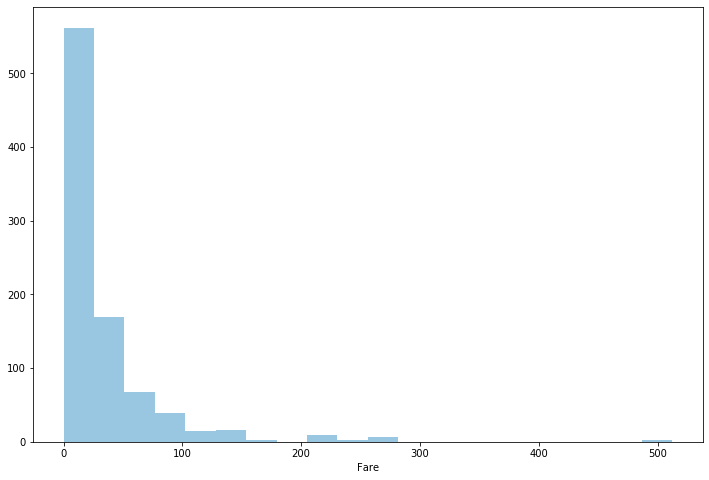

In [208]:
ax, fig = plt.subplots(figsize = (12, 8), )
sns.distplot(a = data["Fare"], bins = 20, kde= False )

In [209]:
#tenemos valores que se arrancan del histpgrama por lejos
#pero hay que ver a que pueden deberse...
#Ej: max
data[data["Fare"] > 150].sort_values(by = "Fare", ascending = True )

,Survived,Pclass,Sex,Age,SibSp,Fare,Nan_check_age
708,1,1,female,22.000000,0,151.5500,0.0
498,0,1,female,25.000000,1,151.5500,0.0
297,0,1,female,2.000000,1,151.5500,0.0
305,1,1,male,0.920000,1,151.5500,0.0
332,0,1,male,38.000000,0,153.4625,0.0
609,1,1,female,40.000000,0,153.4625,0.0
268,1,1,female,58.000000,0,153.4625,0.0
318,1,1,female,31.000000,0,164.8667,0.0
856,1,1,female,45.000000,1,164.8667,0.0
689,1,1,female,15.000000,0,211.3375,0.0


In [210]:
#claramente el valor del orden de 512 es muy grande para el resto, incluso para first class...
data[data["Pclass"]== 1].dropna().describe()

,Survived,Pclass,Age,SibSp,Fare,Nan_check_age
count,216.000000,216.0,216.000000,216.000000,216.000000,216.000000
mean,0.629630,1.0,37.048118,0.416667,84.154687,0.138889
std,0.484026,0.0,14.046369,0.611898,78.380373,0.346634
min,0.000000,1.0,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.0,29.000000,0.000000,30.923950,0.000000
50%,1.000000,1.0,35.000000,0.000000,60.287500,0.000000
75%,1.000000,1.0,47.250000,1.000000,93.500000,0.000000
max,1.000000,1.0,80.000000,3.000000,512.329200,1.000000


In [211]:
#metodo 1: detect arbitrary boundary: se usa un upper y lower boundary para recortar los datos
upper = 300
lower = 5
data_recort = data[data["Fare"].between(5, 300) == True]

In [212]:
data_recort.shape

(872, 7)

In [213]:
#numero de putliers detectados: hay 19 outliers. veamos cuáles son:
outliers_1 = data[(data["Fare"] <5) | (data["Fare"] > 300)]

In [214]:
outliers_1.loc[:, "Fare"].sort_values() #aca estan

179      0.0000
806      0.0000
732      0.0000
674      0.0000
633      0.0000
597      0.0000
815      0.0000
466      0.0000
481      0.0000
302      0.0000
277      0.0000
271      0.0000
263      0.0000
413      0.0000
822      0.0000
378      4.0125
679    512.3292
737    512.3292
258    512.3292
Name: Fare, dtype: float64

In [215]:
#metodo 2: IQR
upper = data["Fare"].quantile(q = 0.75)
lower = data["Fare"].quantile(q = 0.25)
IQR = upper - lower
threshold = 5 * IQR #se eligio un valor de 5 en vez del tipico 1.5
outliers_2 = data[(data["Fare"] < (lower - threshold))  | (data["Fare"] > (upper + threshold)) ]

In [216]:
upper

31.0

In [217]:
lower

7.9104

In [218]:
outliers_2.shape

(31, 7)

In [219]:
#outliers detectados: 31

In [220]:
outliers_2.loc[:, "Fare"].sort_values()

31     146.5208
195    146.5208
305    151.5500
708    151.5500
297    151.5500
498    151.5500
609    153.4625
332    153.4625
268    153.4625
318    164.8667
856    164.8667
730    211.3375
779    211.3375
689    211.3375
377    211.5000
527    221.7792
700    227.5250
716    227.5250
557    227.5250
380    227.5250
299    247.5208
118    247.5208
311    262.3750
742    262.3750
341    263.0000
88     263.0000
438    263.0000
27     263.0000
679    512.3292
258    512.3292
737    512.3292
Name: Fare, dtype: float64

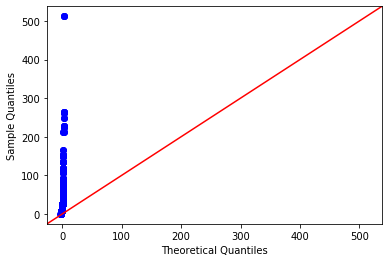

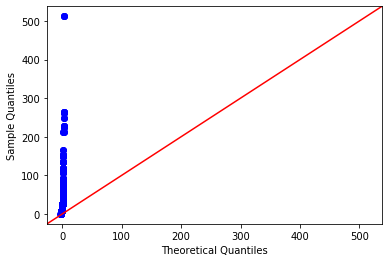

In [221]:
#method 3: Mean and Standard deviation method
#este es un metodo utilizado cuando la dstribucion de los datos es normal
# distribucion normal: simetrica (campana), moda= median= mean
#para chequear si los datos tienen distribucion normal se usa el Quantile-Quantile Plot (qqplot)

#QQ-plot plots your data’s quantiles ba the quantiles that you’d expect from a normal distribution. 
#If the distribution is normal, the plot is a straight diagonal line
#source: https://www.quora.com/How-can-I-tell-if-I-see-a-normal-distribution
import  statsmodels.api as sm
import pylab
sm.qqplot(data["Fare"], line = "45")

In [222]:
#en este caso ni de coña...

In [223]:
#pero probemos igual

In [224]:
#Method description: The Gaussian distribution has the property that the standard deviation from the mean can be used 
#to reliably summarize the percentage of values in the sample.For example, within one standard deviation of the mean will cover 68% of the data.So, if the mean is 50 and the standard deviation is 5, as in the test dataset above, then 
#all data in the sample between 45 and 55 will account for about 68% of the data sample.
#source: https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/


In [225]:
#Three standard deviations from the mean is a common cut-off in practice for identifying outliers in a Gaussian or Gaussian-like distribution. For smaller samples of data, perhaps a value of 2 standard deviations (95%) can be used, and for larger samples, perhaps
#a value of 4 standard deviations (99.9%) can be used.
#formula: upper = mean + 3*std
#lower = mean - 3*std

In [226]:
#implementamos...
low_m, up_m = np.mean(data["Fare"]) - 3 * np.std(data["Fare"]), np.mean(data["Fare"]) + 3 * np.std(data["Fare"])

In [227]:
outliers_m = data[(data["Fare"] < low_m) | (data["Fare"] > up_m)]

In [228]:
outliers_m.shape

(20, 7)

In [229]:
#se detectan 20 outliers con este metodo

In [230]:
outliers_m.loc[:, "Fare"].sort_values()

779    211.3375
730    211.3375
689    211.3375
377    211.5000
527    221.7792
716    227.5250
700    227.5250
380    227.5250
557    227.5250
118    247.5208
299    247.5208
311    262.3750
742    262.3750
27     263.0000
341    263.0000
88     263.0000
438    263.0000
258    512.3292
737    512.3292
679    512.3292
Name: Fare, dtype: float64

In [231]:
#Metodo 4: MAD (Median absolute deviation)
#1) Calculate the median of the population, median(population)
#2) Calculate the deviation from the median, using the absolute value of the deviations, |x — median(population)|= deviation
#3) Find the median of the absolute deviations, median(|deviations|), called scaling factor
#4) Add the scaling factor to the median of the population for the upper bound, using 3 or 3.5 correction
#5) Subtract the scaling factor from the median of the population for the lower bound
#6) Anything outside of the bounds is an outlier

In [232]:
#median of the population
median_fare = np.median(data["Fare"])

In [233]:
#deviation from median
dev_med = [abs(x - median_fare ) for x in data["Fare"]]

In [234]:
#find median of dev_med
scaling_factor = np.median(dev_med)

In [235]:
#upper and lower bounds
up_v, low_v = median_fare + 3.5 * scaling_factor, median_fare - 3.5 * scaling_factor

In [236]:
#recortamos para sacar los outliers...
outliers_4 = data[(data["Fare"] < low_v) | (data["Fare"] > up_v) ]

In [237]:
outliers_4.shape

(189, 7)

In [238]:
#HANDLING THE OUTLIERS DETECTED


In [239]:
#metodo 1: Imputing with arbitrary value
#usando los outliers localizados en el metodo 1 (arbitray boundaries)...
data_recort.shape

(872, 7)

In [240]:
#reempalzaremos todos los outliers por un valor -999
outliers_1 = data[(data["Fare"] <5) | (data["Fare"] > 300)]

In [241]:
def arb_value(item):
    lower_1, upper_1 = 5,300
    if ((item < lower_1) | (item > upper_1)):
        item = -999         
    return item

In [242]:

data_arb= data.copy()
data_arb["Fare"] = data_arb["Fare"].apply(arb_value) #aplicamos la funcion a cada elemento de columna fare

In [243]:
data_arb["Fare"][258]

-999.0

In [244]:
data["Fare"][258]

512.3292

In [245]:
#metodo 2: Windsorization

In [246]:
#consiste en reemplazar los datos del 10% mas extremo superior y el 10% extremo inferior por los
#valores limite de sus percentiles respectivos (tambien poede ser 5% u otro %)
#source: https://en.wikipedia.org/wiki/Winsorizing
###EJEMPLO USANDO SCIPY.STATS
import scipy.stats 


In [247]:
y = np.array([92, 19, 67, 58, 1053, 91, 26, 78, 10, 13, -40, 101, 86, 85, 15, 89, 89, 28, -58, 41])

In [248]:
scipy.stats.mstats.winsorize(a = y, limits=[0.05, 0.05])

masked_array(data=[ 92,  19,  67,  58, 101,  91,  26,  78,  10,  13, -40,
                   101,  86,  85,  15,  89,  89,  28, -40,  41],
             mask=False,
       fill_value=999999)

In [249]:
data_win = data.copy()

In [250]:
#identificamos los numeros que quedaran arriba y abajo para ser ereemlazados

In [251]:
def windsor(col, limits):
    yn = np.sort(col)
    abajo = int(limits[0] * len(yn))
    arriba = int(limits[1] * len(yn))
    th1 = int(yn[abajo])
    th2 = int(yn[- (arriba + 1)])
    for i in range(len(yn[:abajo])):
        yn[i] = th1
    for i in range(len(yn) - arriba , len(yn)):
        yn[i] = th2
    return yn


In [252]:
data_win["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [253]:
data_win["Fare"] = windsor(col = data_wind["Fare"], limits = (0.1, 0.1))

NameError: name 'data_wind' is not defined

In [ ]:
data_win["Fare"][:10] # solo una muestra porque gasta el valor 89 se reemplza por abajo

In [ ]:
#metodo 3: chanchamente deshacerse de los datapoints outliers..
#tomamos cualquier caso de los de arriba
use_cols = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Survived']
data = pd.read_csv("titanic.csv", usecols= use_cols, )
data_disc = data.copy()

In [ ]:
#ejemplo; valores de Fare sore 300 y bajo 5 
data_disc = data[(data["Fare"] > 5) & (data["Fare"] < 300)]

In [ ]:
data_disc.max()

In [ ]:
####SIMBOLO OR EN MAC: ALT + 1 

In [ ]:
data_disc.describe()

In [ ]:
#metodo 3: replace the outliers with mean, median or mode

In [ ]:
promedio_fare= data["Fare"].mean()

In [ ]:
#reemplazaremos todos los que estan fuera de rango con promedio...

In [ ]:
data_r = data.copy()

In [ ]:
data_r.describe()

In [ ]:
promedio_fare= data["Fare"].mean()

In [ ]:
promedio_fare

In [ ]:
data_r.head()

In [ ]:
#df['my_channel'].mask(df['my_channel'] > 20000, 0, inplace=True)
data_r['Fare'].mask(cond = (data_r["Fare"] <5) | (data_r["Fare"] > 300), other = promedio_fare, inplace=True)
###MASK PERMITE REEMPLAZAR LOS VALORES QUE COMPLAN CON CONDICION COND ASIGNANDOLES EL VALOR OTHER



In [ ]:
data_r["Fare"][258]

###############

####2.3 RARE VALUES

In [ ]:
#Definicion: son aquellas variables categoricas que muestran algunos valores que aparecen muy esporadicamente

In [ ]:
#en casos como deteccion de fraudes pueden ser muy valiosos

In [ ]:
#why rare values matter??
#can cause overfitting
#if they are n the training set and not in test set it will overfit train set
#if they are in test set and not in train set the model will not know what to do with it

In [ ]:
#Recipe:
#two methods: - mode imputation or create a new category for the rares called RARE for eg
#when there's one predominant category (over 90%) in the variable: observe the relationship between that variable 
#and the target, then either discard that variable, or keep it as it was. In this case, 
#variable often is not useful for prediction as it is quasi-constant (as we will later see in Feature Selection part).
#when there's a small number of categories: keep it as it was. Because only few categories are unlikely 
#to bring so much noise.
#when there's high cardinality: try the 2 methods above. But it does not guarantee 
#better results than original variable.

In [ ]:
#load dataset

In [ ]:
use_cols = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp','Survived']
data = pd.read_csv("titanic.csv", usecols= use_cols)

In [ ]:
data.head()

In [ ]:
#analicemos antes la proporcion de cada clase en cada variable
data["Pclass"].value_counts(normalize = True)

In [ ]:
data["SibSp"].value_counts(normalize= True)

In [ ]:
#SibSp tiene valores 3,5 y 8 que aparecen menos del 2% de las veces

In [ ]:
#trataremos Sibsp, ya que con Pclass tenemos solo 3 clases y ninguna tiene una predominancia de 90% o algo asi

In [ ]:
#Metodo 1: replace the clases with the mode

In [ ]:
data_rare1 = data.copy()

In [ ]:
data_rare1.SibSp.value_counts()

In [ ]:
#claramente mode es clase 0
#usaremos mask
data_rare1["SibSp"].mask(cond = (data_rare1["SibSp"] == 3) | (data_rare1["SibSp"] == 5) |
                          (data_rare1["SibSp"] == 8), other = 0, inplace = True  )

In [ ]:
data_rare1["SibSp"].value_counts()

In [ ]:
#metodo 2: create a new category for the rare...

In [ ]:
# De nuevo no tocamos a la variable Pclass, sino solo a SibSp

In [ ]:
dr = data.copy()

In [ ]:
dr.SibSp.value_counts()

In [ ]:
#creamos la variable para las clases 3,5 y 8

In [ ]:
dr["SibSp"].mask(cond =  (dr["SibSp"] == 3) | (dr["SibSp"] == 5) |
                          (dr["SibSp"] == 8), other= "RARE", inplace = True)

In [ ]:
dr["SibSp"].value_counts()

In [ ]:
#2.4 HIGH CARDINALITY: high number of categories in a variable

In [ ]:
#methods:
#create a new category to regroup labels with low ocurrence
#grouping labels with business understanding
#grouping labels with a desision tree

In [ ]:

######PROXIMA: FEATURE ENGINEERING

# 3. FEATURE ENGINEERING

# 3.1 Feature Scaling

In [ ]:
#url: https://medium.com/@swethalakshmanan14/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff

##RECIPE: - Normalize: when features have varying scales and you dont know the distribution of your data. 
# useful with algorithms tha dont make assumptions on the distruibution of your data. Eg: NN, K-Nearest
##        - Standarize: when  features have varying scales and you know the distribution of your data is gaussian. 
#          useful with algorithms tha assume your data is gaussian. Eg: linear regression, linear regression, discriminant.

#Metodo1: Standarization(Zscore)
# value = (value - mean)(std)

In [ ]:
#normalicemos Fare

In [ ]:
dr = data.copy()

In [ ]:
dr.Fare.describe()

In [ ]:
prom, std = dr["Fare"].mean(), dr["Fare"].std()
def zcored(item):
    return(item - prom)/std
     

In [ ]:

dr["Fare_Zscored"] = dr["Fare"].apply(zcored)

In [ ]:
dr.head()

In [ ]:
dr["Fare_Zscored"].describe() #vemos que se cumple que la distribucion de Fare_Zscored tiene media 0 y std 1

In [ ]:
#Metodo 2: NORMALIZATION Min-max scaling
#transforma los datos dejando todos sus valores dentro de un rango determinado.Por defecto [0,1] 

In [ ]:
#Formula: X_scaled = (X - X.min / (X.max - X.min)

In [ ]:
maxy, miny = dr["Fare"].max(), dr["Fare"].min()

In [ ]:
def minmax(item):
    return (item - miny)/(maxy - miny)
    

In [ ]:
dr["Fare_minmax"] = dr["Fare"].apply(minmax) 

In [ ]:
dr.head()

In [ ]:
dr["Fare_minmax"].describe() #vemos que todos los valores quedan entre 0 y 1

In [ ]:
#metodo3: NORMALIZATION Robust scaling
#consiste en reescalar los valores usando el IQR
#formula: x = (x - mediana)/IQR

In [ ]:
#implementamos...
mediana, IQR = dr["Fare"].median(), (dr["Fare"].quantile(0.75) - dr["Fare"].quantile(0.25))

In [ ]:
def robust(item):
    return (item - mediana)/IQR

In [ ]:
dr["Robust"] = dr["Fare"].apply(robust)

In [ ]:
dr.head()

In [ ]:
dr.Robust.describe()

In [ ]:
dr.describe()

In [ ]:
dr.describe(include = [np.object])

In [ ]:
dr.describe(include = [np.number])

## 3.2 DISCRETIZE

In [ ]:
#Definicion: se usa para transformar variables continuas a discretas usando intervalos que cubran todo el espectro de valores

In [ ]:
#reloading dataset to start fresh...
use_cols = [ 'Pclass', 'Sex', 'Age', 'Fare', 'SibSp','Survived']

data = pd.read_csv("titanic.csv", usecols=use_cols)

In [ ]:
data.head()

In [ ]:
# La unica variable con valores continuos es Fare...
data.Fare.describe()

In [ ]:
sns.distplot( a = data.Fare, bins = 40, kde = False)

In [ ]:
#Metodo 1: Equal width binning
# Consiste en dividir el espectro de valores en N bins de igual ancho
# t = (x.max - x.min)/ N
df = data.copy()


In [ ]:
#mi implementación
def discrete(col, N):
    t = (np.max(col) - np.min(col))/N
    new = col.copy()
    bins = {}  #creo los bins
    for i in range(N):
        bins[i] = (np.min(col) + i * t, np.min(col) + (1 +i) *t)#lleno los bins
    for i in range(len(col)):#distribuyo valores por bins en columna new
        for j in range(len(bins)):
            if (col[i] >= bins[j][0] and col[i] <= bins[j][1]):
                new[i] = j
    return new  

In [ ]:
data.Fare.describe()

In [ ]:
df["Fare_discretized"] = discrete(data.Fare, 3)

In [ ]:
df.groupby("Fare_discretized").size()

In [ ]:
##Implementación usando herramientas de sklearn...
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split


In [ ]:
data2 = data.copy()

In [ ]:
#a diferencia de mi implementacion, se usará un train y test set acá
X_train, X_test, y_train, y_test = train_test_split(data2, data2.Survived, test_size = 0.3, random_state = 42)

In [ ]:
X_train.shape, X_test.shape

In [ ]:
enc_equal_width = KBinsDiscretizer(n_bins=3, encode="ordinal",strategy= "uniform").fit(X_train[["Fare"]])

In [ ]:
enc_equal_width.bin_edges_ #muestra todos los valores

In [ ]:
result = enc_equal_width.transform(X_train[["Fare"]]) #genera un array de todos los valores asignados segun bin

In [ ]:
pd.DataFrame(result)[0].value_counts()


In [ ]:
#agregamos la columna nueva a el X_train pero hacenms una copia antes
X_train_copy = X_train.copy(deep = True)

In [ ]:
X_train_copy["Fare_equal_width"] = enc_equal_width.transform(X_train[["Fare"]])

In [ ]:
X_train_copy.head(10)

In [ ]:
#metodo2: equal frequency binning
#Divide los datos en N Bins, donde cada bins tiene la misma cantidad de observaciones


In [ ]:
#Mi implementacion...
def equal_freq(col, N):
    t = int(len(col) / N) # nro observaciones por bin
    new = col.copy() #copia y ordenado de columna
    bins = []  #creo los bins
    k = np.sort(col)
    for i in range(N):
        if i == N - 1:
            bins.append(k[i * t:])
        else:
            bins.append(k[i * t: t + i * t])#lleno los bins
            
    for i in range(len(col)):#distribuyo valores de categoria por bins en columna new
        for j in range(len(bins)):
            if col[i] in bins[j]: 
                new[i] = j
    return new

        

In [ ]:
#test...
data3 = data.copy()

In [ ]:
data3["Fare"].describe()

In [ ]:
new2 = equal_freq(data3["Fare"], 3)

In [ ]:
type(new2) 

In [ ]:
data3["Fare_Eq_Freq"] = new2

In [ ]:
data3.head()

In [ ]:
#metodo 3: K-Means Binning
#utiliza el algoritmo de K-Means para clusterizar los datos

In [ ]:
sns.scatterplot(data = data["Fare"])

In [ ]:
def K_means(col, K): #col: data, K:nr or centroids
    #initialization of clusters
    clusters = {}
    for i in range(K):#creates a dict with empty lists to be filled
        clusters[i] = []
    #random initialization of centroids...
    centroids = np.array(np.random.rand(K))
    #Assignment of datapoints with shortest distance criteria
    for n in range(300): #300 iterations
        #guardamos una copia de centroides vigentes para comparar
        old_centroids = centroids.copy()
        for item in col:
            j = np.argmin([np.sqrt((cent - item)**2) for cent in centroids])
            clusters[j].append(item)
        #print("clusters iteracion", n, clusters)
        #actualizo centroides con mean()
        centroids = [np.mean(clusters[i]) for i in clusters]
        if np.sqrt(np.sum(np.array(centroids) - np.array(old_centroids))**2) < 0.01:
            break
        for l in range(len(centroids)):
            if np.isnan(centroids[l]):
                centroids[l] = 0
        #print("centroides con nuevo promedio:", centroids)
        #print("clusters:", clusters)
        #empty the clusters to be filled again in next iteration
        final_cluster = clusters.copy()
        for i in range(K):
            clusters[i] = []
    print("Resultado clusterizacion con K-absMeans:")
    print("Centroides finales: ", centroids)
    for m in range(len(clusters)):
        print("Cluster", i,":", len(clusters[m]), "elementos")
        
    return final_cluster, centroids, n
    
    
        


In [ ]:
clust, cent, n = K_means(data["Fare"], 3)


In [ ]:
#metodo 4:Discretisation with Decision Trees...
#using a decision tree to identify the optimal splitting points that will determine the bins...

In [ ]:
#url: https://youtu.be/7VeUPuFGJHk


In [ ]:
#metodo 5: Discretisation with Decision Tree with optimal depth search
#url: https://github.com/malfaroe/feature-engineering-and-feature-selection/blob/master/3.2_Demo_Discretisation.ipynb

In [ ]:
#metodo 6: Discretisation with Chi-Merge (most recommended)
#url :https://github.com/malfaroe/feature-engineering-and-feature-selection/blob/master/3.2_Demo_Discretisation.ipynb

## 3.3 FEATURE ENCODING

In [ ]:
#FEATURE ENCODING: is the process of taking categorical variables and transform the into numbers so algorithms 
#can handle them

#url: https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02

# REPASO:
One_hot_encoding: usando get_dummy separamos las n-1 categorias 001,010,100,000, etc
Label_encoding: simplemente le ponemos un rotulo a cada clase (Moscu:1, Santiago: 2, etc) y mapeamos 
Mean encoding: Se reemplaza cada nombre por el promedio de ocurrencias de target en cada clase
Target-encoding: se suaviza el promedio anterior para que el algoritmo se represente mejor el peso de cada clase

In [ ]:
#Method 1: One-hot-encoding
#replace categorical variable with boolean variables (0/1) to indicate whether or not certain variable
#is True for that observation

In [ ]:
## tutorial previo
train = pd.read_csv("http://bit.ly/kaggletrain")

In [ ]:
train.head(3)

In [ ]:
 pd.get_dummies(data = train["Sex"]).head()

In [ ]:
train.head(2)

In [ ]:
#turco corto pandas: tomamos todas las columnas que queremos dummear y agregamos drop_first de manera que deje n-1
pd.get_dummies(data = train, columns = ["Sex", "Embarked"], drop_first= True).head(2)

In [ ]:
## implementamos

In [ ]:
use_cols = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp','Survived', "Embarked"]
data = pd.read_csv("titanic.csv", usecols = use_cols)


In [ ]:
data.columns

In [ ]:
data_one_hot = pd.get_dummies(data = data, columns = ["Sex", "Embarked"], drop_first= True)

In [ ]:
data_one_hot.head()

In [ ]:
#Metodo 2: Ordinal encoding
#replaces the values for ordinal numbers if ordinal is meaningful
#Ordinal encoding is done to ensure encoding of variable retains ordinal nature of the variable

In [ ]:
dict = {"temperature": ["Hot", "Warm", "Cold", "Freeze"], "Humidity":[12, 89,45,11], "Sex":["M", "M", "F", "M"], "Target": [1,0,0,1]}

In [ ]:
dd = pd.DataFrame(data = dict, columns = ["temperature", "Humidity","Sex", "Target"])

In [ ]:
dict2 = {"temperature": ["Hot", "Warm", "Cold", "Freeze", "Cold", "Warm"]}
dd2 = pd.DataFrame(data = dict2, columns= ["temperature"])

In [ ]:
dd2

In [ ]:
#convertimos asignando desde 1 por ejemplo:
temp_dict = {"Hot": 1, "Warm": 2, "Cold":3, "Freeze":4} #vamos a suponer que tienen un caracter ordinal

In [ ]:
dd2["Temp_ordinal_enc"] = dd2["temperature"].map(temp_dict)

In [ ]:
dd2

In [ ]:
#metodo 3: Mean encoding
#es el mas popularmente utilizado (Kaggle)
#
#1.Select a categorical variable you would like to transform
#2. Group by the categorical variable and obtain aggregated sum over “Target” variable. (total number of 1’s for each category in ‘Temperature’)
#3. Group by the categorical variable and obtain aggregated count over “Target” variable
#4. Divide the step 2 / step 3 results and join it back with the train.

In [ ]:
#utilizamos la siguiente dataset
dict3 = {"Temperature": ["Hot", "Cold", "Very Hot", "Warm", "Hot", "Warm", "Warm", "Hot", "Hot", "Cold"], 
        "Color": ["Red", "Yellow", "Blue", "Blue", "Red", "Yellow", "Red", "Yellow", "Yellow", "Yellow"],
         "Target": [1,1,1,0,1,0,1,0,1,1]}

In [ ]:
df3 = pd.DataFrame(data = dict3, columns= ["Temperature", "Color", "Target"])

In [ ]:
df3

In [ ]:
#Elegimos Temperature
#agrupamos por suma de targets por cada clase de temperature
df3.groupby("Temperature")["Target"].agg({"Target": "sum"})

In [ ]:
#contamos frecuencias de cada clase...
df3.Temperature.value_counts()

In [ ]:
df3

In [ ]:
temp_counts = df3.groupby("Temperature").size()

In [ ]:
temp_target = df3.groupby("Temperature")["Target"].sum()

In [ ]:
temp_target / temp_counts

In [ ]:
df3["Temp_mean_encoded"] = df3["Temperature"].map(temp_target / temp_counts)

In [ ]:
df3

In [ ]:
# HACIENDOLA MAS CORTA:
#df3.groupby("Temperature")["Target"].mean() # agrupe por temperature y asigne promedio de target de cada clase (promedio todo el
#dataset)
#Y LUEGO MAPEAMOS:
#df3["Mean_T"] = df3["Temperature"].map(df3.groupby("Temperature")["Target"].mean())

## REPASO:
One_hot_encoding: usando get_dummy separamos las n-1 categorias 001,010,100,000, etc
Label_encoding: simplemente le ponemos un rotulo a cada clase (Moscu:1, Santiago: 2, etc) y mapeamos
Mean encoding: Se reemplaza cada nombre por el promedio de ocurrencias de target en cada clase
Target-encoding: se suaviza el promedio anterior para que el algoritmo se represente mejor el pesod e cada clase

In [ ]:
##Metodo 4:Target-encoding
#smoothed_likelihood = (promedio_categoria_target * count(nrows) promedio_general_target * weight) / (weight + nrows)


In [254]:
dict4 = {"Temperature": ["Hot", "Cold", "Very Hot", "Warm", "Hot", "Warm", "Warm", "Hot", "Hot", "Cold"], 
        "Color": ["Red", "Yellow", "Blue", "Blue", "Red", "Yellow", "Red", "Yellow", "Yellow", "Yellow"],
         "Target": [1,1,1,0,1,0,1,0,1,1]}
df4 = pd.DataFrame(data = dict4, columns=["Temperature", "Color", "Target"])

In [280]:
#defino un weight para suavizar
weight = 0.5

In [281]:
#smoothed_likelihood = (promedio_categoria_target * count(nrows)  + promedio_general_target * weight) / (weight + nrows)

In [282]:
df5 = pd.read_csv("titanic.csv")

In [283]:
df5.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [269]:
agg_sex = df5.groupby("Sex")["Survived"].agg(["count", "mean"]) #creo un dataframe con datos de frecuencia y promedio de survived
#separado por sexo

In [268]:
mean_cat, count_cat = agg_sex["mean"], agg_sex["count"] #promedio y frecuencia de cada uno

In [270]:
mean_survived = df5["Survived"].mean() #promedio general del target

In [273]:
smooth_sex = (mean_cat * count_cat + mean_survived * weight) /(weight + count_cat)#creo los valores de smooth para cada sex

In [274]:
smooth_sex #estos van a ser mapeados en todo el dataframe df5

Sex
female    0.741469
male      0.189077
dtype: float64

In [277]:
df5["target_encoded"] = df5["Sex"].map(smooth_sex) #mapeo smooth con columna sex

In [279]:
df5.head() #listo

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,target_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.189077
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.741469
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.741469
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.741469
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.189077


In [325]:
#metodo 5: WEIGHT IOF EVIDENCE ENCODING (WOE)
# woe es un indicador del poder predictivo que tiene una variable independiente (Sex) sobre la dependiente (Survived)
#woe = ln(Distribution_of_Goods / Distribution_of_Bads)
# Distribution_of_Goods: % de eventos favorables (ej: survived = 1) en el dataframe


In [326]:
woe_df = df4.groupby("Temperature")["Target"].mean() #eventos favorables Distrbution of goods por categoria

In [327]:
woe_df

Temperature
Cold        1.000000
Hot         0.750000
Very Hot    1.000000
Warm        0.333333
Name: Target, dtype: float64

In [328]:
woe_df = pd.DataFrame(woe_df) #convierto a dframe

In [329]:
type(woe_df)

pandas.core.frame.DataFrame

In [330]:
#cambiemos el nomre para que quede como Dist_good
woe_df = woe_df.rename(columns= {"Target":"Dist_Good"})

In [331]:
woe_df.head()

,Dist_Good
Temperature,
Cold,1.000000
Hot,0.750000
Very Hot,1.000000
Warm,0.333333


In [332]:
#agrego una columna para los dist_bad:
woe_df["Dist_Bad"] = 1 - woe_df["Dist_Good"]


In [333]:
woe_df

,Dist_Good,Dist_Bad
Temperature,,
Cold,1.000000,0.000000
Hot,0.750000,0.250000
Very Hot,1.000000,0.000000
Warm,0.333333,0.666667


In [349]:
#como hay valores de dist bad que son cero, los reemplazamos por un valor chiquito o el ln caga
#usamos where:
#syntax: np.where(condicion, que valor vamos a rremplazar donde ocurra la condicion, que se hace con el resto)
woe_df["Dist_Bad"] = np.where(woe_df["Dist_Bad"] == 0, 0.000001, woe_df["Dist_Bad"])

In [350]:
#Calculamos woe:
woe_df["WOE"] = np.log(woe_df["Dist_Good"] / woe_df["Dist_Bad"]) 

In [351]:
woe_df

,Dist_Good,Dist_Bad,WOE
Temperature,,,
Cold,1.000000,0.000001,13.815511
Hot,0.750000,0.250000,1.098612
Very Hot,1.000000,0.000001,13.815511
Warm,0.333333,0.666667,-0.693147


In [352]:
#finalmente mapeamos en df4...

In [359]:
df4["WOE"] = df4["Temperature"].map(woe_df["WOE"]) 

In [361]:
df4

,Temperature,Color,Target,WOE
0,Hot,Red,1,1.098612
1,Cold,Yellow,1,13.815511
2,Very Hot,Blue,1,13.815511
3,Warm,Blue,0,-0.693147
4,Hot,Red,1,1.098612
5,Warm,Yellow,0,-0.693147
6,Warm,Red,1,-0.693147
7,Hot,Yellow,0,1.098612
8,Hot,Yellow,1,1.098612
9,Cold,Yellow,1,13.815511


In [366]:
woe_sex = df5.groupby("Sex")["Survived"].mean()

In [367]:
woe_sex

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [368]:
#convierto a dataframe...
woe_sex = pd.DataFrame(woe_sex)

In [369]:
woe_sex

,Survived
Sex,
female,0.742038
male,0.188908


In [370]:
#cambio nombre como Dist_Good
woe_sex = woe_sex.rename(columns={"Survived": "Dist_Good"})

In [371]:
woe_sex

,Dist_Good
Sex,
female,0.742038
male,0.188908


In [372]:
#creo columna bad

In [373]:
woe_sex["Dist_Bad"] = 1 - woe_sex["Dist_Good"]

In [374]:
woe_sex

,Dist_Good,Dist_Bad
Sex,,
female,0.742038,0.257962
male,0.188908,0.811092


In [378]:
#calculamos...
#por si sale un cero en denominador...
woe_sex["Dist_Bad"] = np.where(woe_sex["Dist_Bad"] == 0, 0.0001, woe_sex["Dist_Bad"])

In [380]:
woe_sex["Woe"] = np.log(woe_sex["Dist_Good"] / woe_sex["Dist_Bad"]) #usando formula

In [381]:
woe_sex

,Dist_Good,Dist_Bad,Woe
Sex,,,
female,0.742038,0.257962,1.056589
male,0.188908,0.811092,-1.457120


In [382]:
#mapeamos...
df5["Woe_Sex"] = df5["Sex"].map(woe_sex["Woe"])

In [383]:
df5.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WOE_Sex,Woe_Sex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,-1.457120
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN,1.056589
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,1.056589
